In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/healthcare-dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(path + "/healthcare_dataset.csv")

##Data Cleaning & Preprocessing ##

In [ ]:
# check data
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
# Convert date columns to datetime format for consistency and proper analysis.
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [ ]:
# check missing values
data.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
data.shape

(55500, 15)

In [ ]:
# check duplicated
data.duplicated().sum()
data.drop_duplicates(inplace=True)
print(f"After removing duplicates, the dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

After removing duplicates, the dataset contains 54966 rows and 15 columns.


##Data Analysis ##

In [ ]:
data_categorical = data.select_dtypes(include='object')
for col in data_categorical:
    print(f"\nUnique values for '{col}':")
    print(data[col].unique())



Unique values for 'Name':
['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']

Unique values for 'Gender':
['Male' 'Female']

Unique values for 'Blood Type':
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Unique values for 'Medical Condition':
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Unique values for 'Doctor':
['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']

Unique values for 'Hospital':
['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']

Unique values for 'Insurance Provider':
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Unique values for 'Admission Type':
['Urgent' 'Emergency' 'Elective']

Unique values for 'Medication':
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Unique values for 'Test Results':
['Normal' 'Inconclusive' 'Abnormal']


In [ ]:
value_counts_cols = [data['Gender'], data['Blood Type'], data['Medical Condition'], data['Insurance Provider'], data['Admission Type'], data['Medication'], data['Test Results']]
for col in value_counts_cols:
    print(col.value_counts())
    print("-"*50)

Gender
Male      27496
Female    27470
Name: count, dtype: int64
--------------------------------------------------
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64
--------------------------------------------------
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64
--------------------------------------------------
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64
--------------------------------------------------
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64
--------------------------------------------------
Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicilli

In [ ]:
# Since "room number" is merely an identifier and does not contribute to the analysis, we dropped it.
data.drop(columns=['Room Number'], inplace=True)
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
print("Minimum age:", data['Age'].min())
print("Maximum age:", data['Age'].max())

Minimum age: 13
Maximum age: 89


In [ ]:
data.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count').sort_values(by='Count')

,Blood Type,Gender,Count
15,O-,Male,3328
8,B+,Female,3348
1,A+,Male,3362
4,AB+,Female,3407
2,A-,Female,3418
13,O+,Male,3421
10,B-,Female,3425
6,AB-,Female,3428
12,O+,Female,3434
7,AB-,Male,3446


In [ ]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,Elective,2019-05-31,Ibuprofen,Abnormal


##Visualization ##

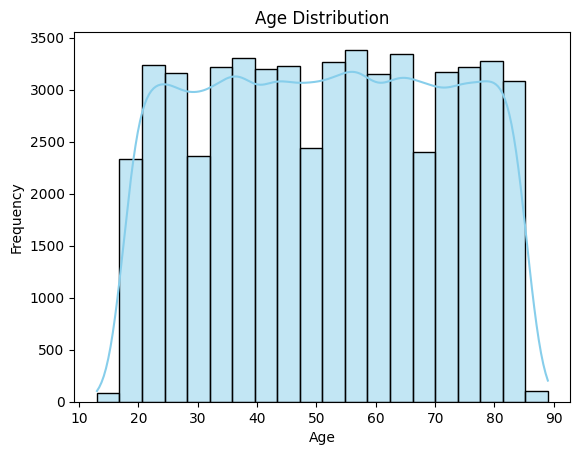

In [ ]:
# Visual representation of Age Distribution
sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

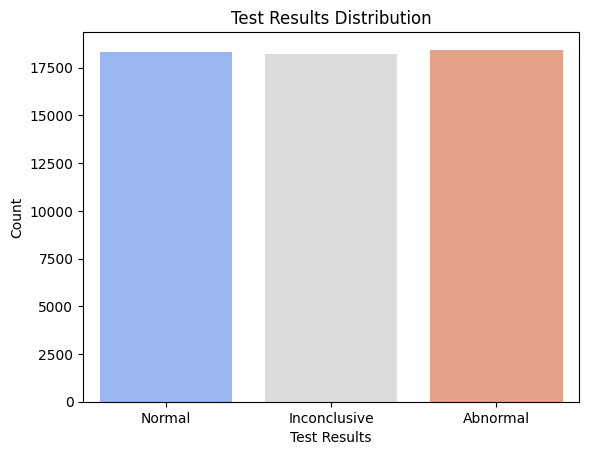

In [ ]:
sns.countplot(data=data, x='Test Results', palette='coolwarm')
plt.title('Test Results Distribution')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

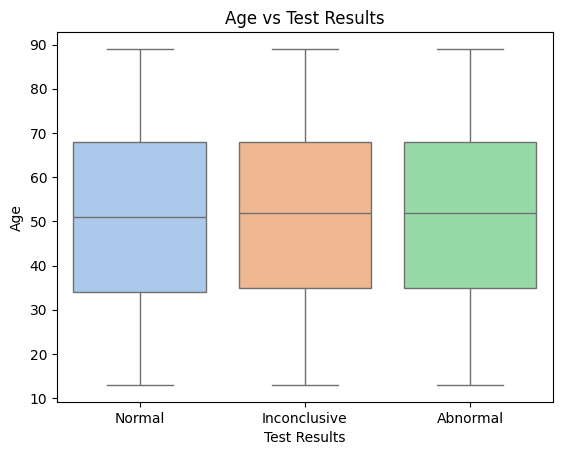

In [ ]:
# Relationship between Age and Test Results
sns.boxplot(data=data, x='Test Results', y='Age', palette='pastel')
plt.title('Age vs Test Results')
plt.xlabel('Test Results')
plt.ylabel('Age')
plt.show()

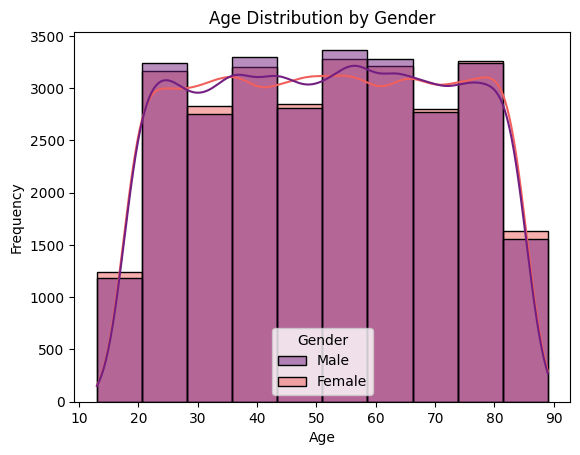

In [ ]:
# Relationship between Age and Gender
sns.histplot(data=data, x='Age', hue='Gender', kde=True, bins=10, palette='magma')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

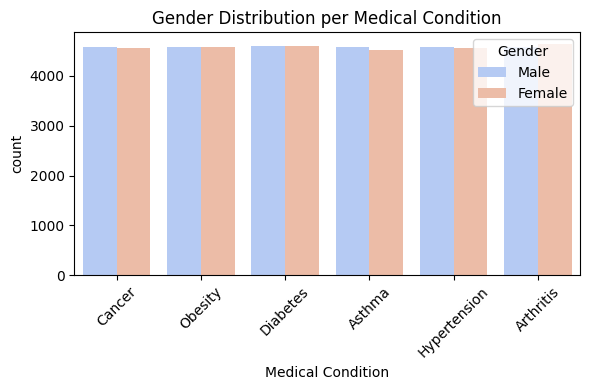

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Medical Condition', hue='Gender', palette='coolwarm')
plt.title('Gender Distribution per Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

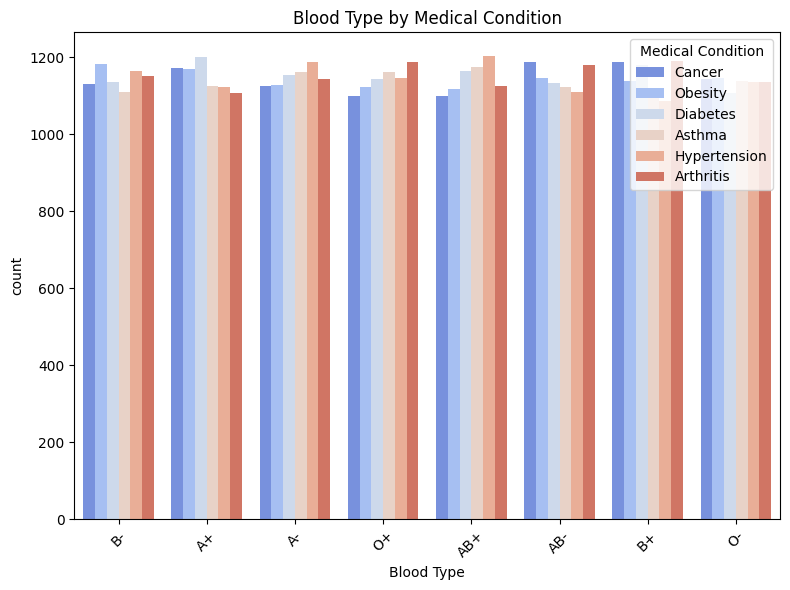

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Blood Type', hue='Medical Condition', palette='coolwarm')
plt.title('Blood Type by Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


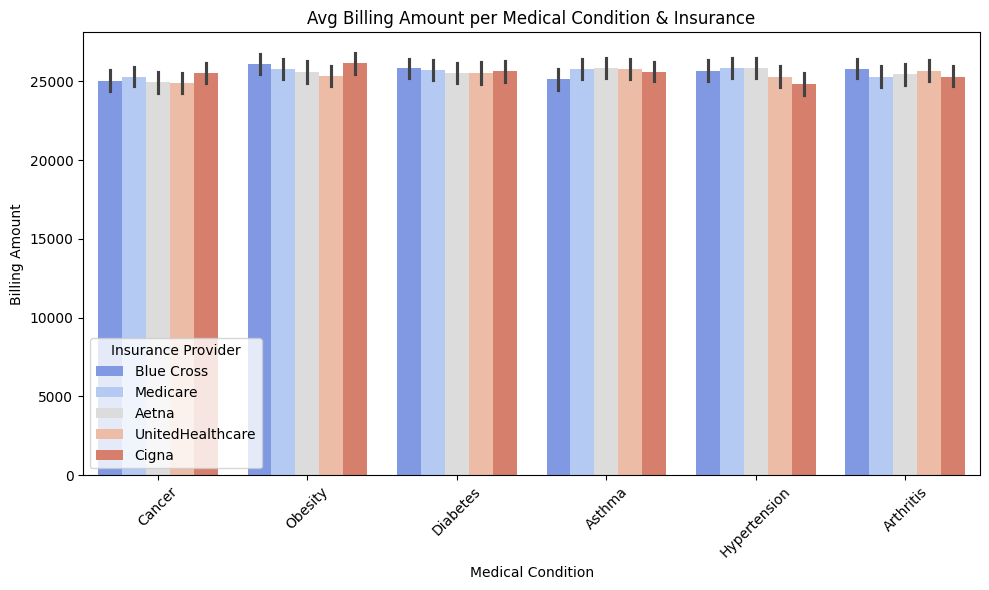

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Medical Condition', y='Billing Amount', hue='Insurance Provider', estimator='mean', palette='coolwarm' )
plt.title('Avg Billing Amount per Medical Condition & Insurance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

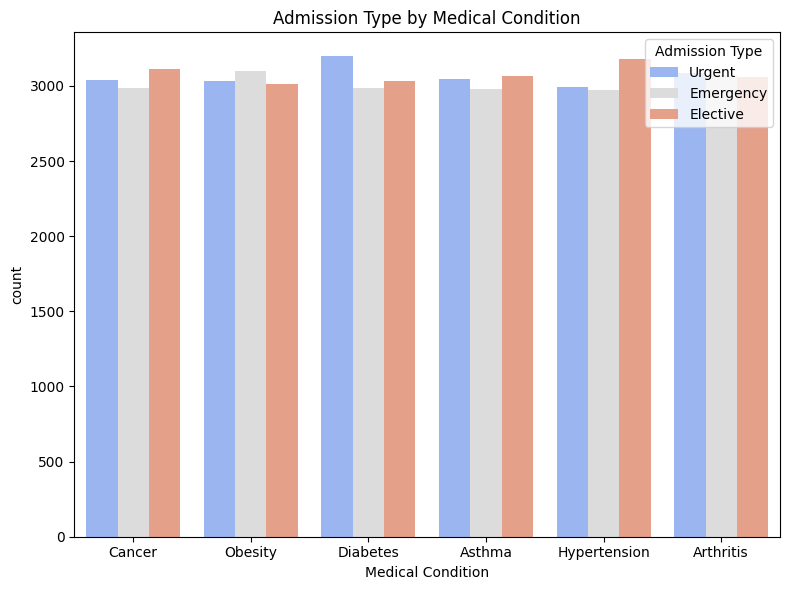

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Medical Condition', hue='Admission Type', palette='coolwarm')
plt.title('Admission Type by Medical Condition')
plt.tight_layout()
plt.show()

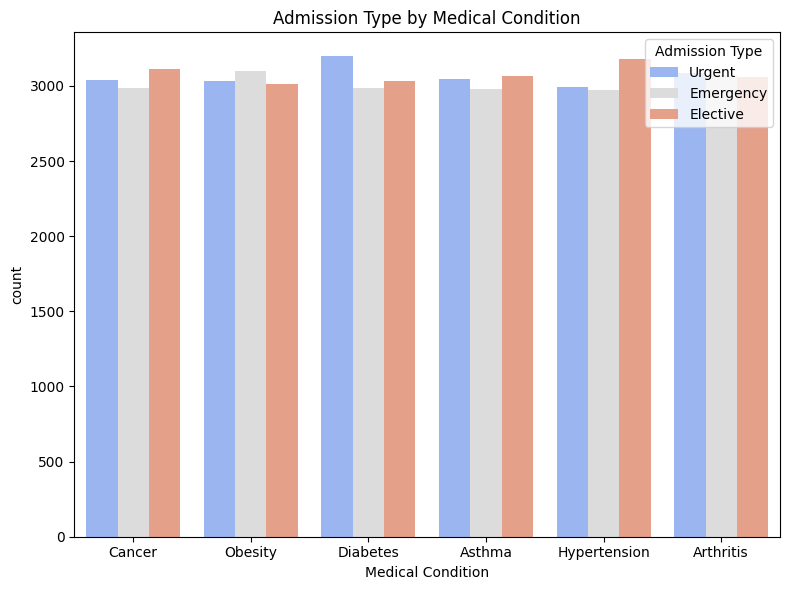

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Medical Condition', hue='Admission Type', palette='coolwarm')
plt.title('Admission Type by Medical Condition')
plt.tight_layout()
plt.show()

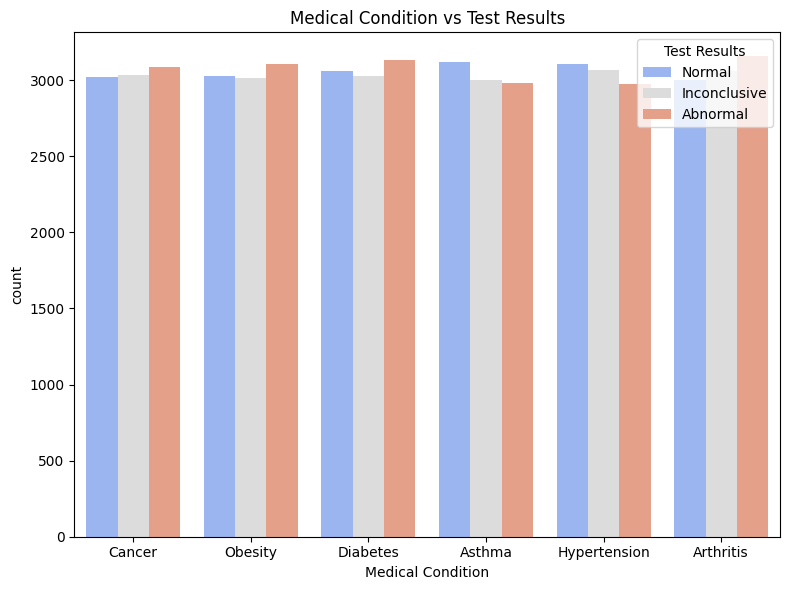

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Medical Condition', hue='Test Results', palette='coolwarm')
plt.title('Medical Condition vs Test Results')
plt.tight_layout()
plt.show()

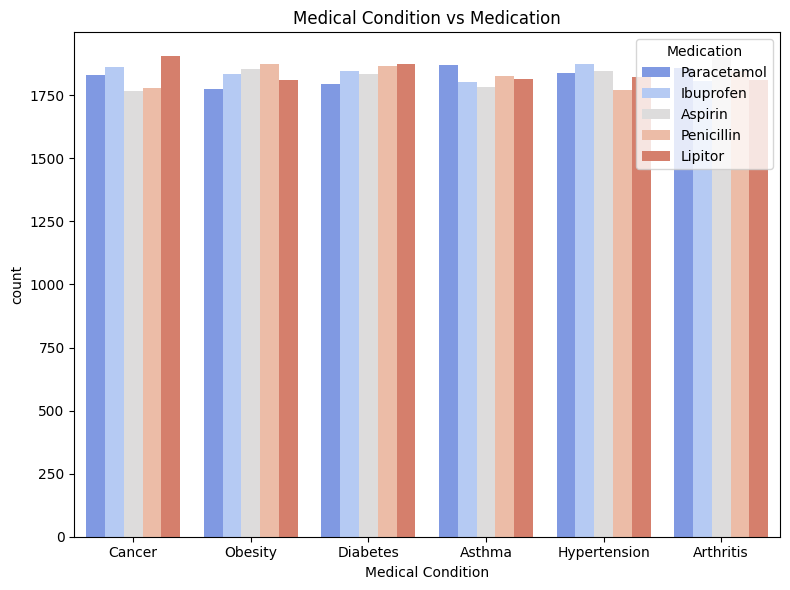

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Medical Condition', hue='Medication', palette='coolwarm')
plt.title('Medical Condition vs Medication')
plt.tight_layout()
plt.show()